In [1]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import wget
import os
from astropy.wcs import WCS
from scipy.stats import scoreatpercentile
from astropy.visualization import simple_norm
from astropy.table import Table
import matplotlib.image as mpimg
from reproject import reproject_interp

homedir = os.getenv("HOME")

In [19]:
#testing pixscale with UGC06711 cutout

vf=Table.read(homedir+'/v2_snrcoadd.fits')
galaxy = vf[np.where(vf['objname']=='UGC06711')[0]]

In [20]:
wise_image = homedir+'/UGC06711/UGC06711-custom-image-W3.fits.fz'
wise_hdu = fits.open(wise_image)[1]

wcs_wise = WCS(wise_hdu.header)

In [3]:
def pull_LS_image_fits(galaxy,pixscale):
    ra = str(galaxy['RA_1'][0])
    dec = str(galaxy['DEC_1'][0])
    galname = str(galaxy['VFID'][0])
    pixscale = str(pixscale)
    image_url = 'https://www.legacysurvey.org/viewer/cutout.fits?ra='+ra+'&dec='+dec+'&layer=ls-dr9&pixscale='+pixscale
    filename = homedir+'/Desktop/'+galname+'.fits'
    if os.path.exists(filename):
        os.remove(filename)
        image = wget.download(image_url,out=filename)
    else:
        image = wget.download(image_url,out=filename)
    return filename

In [4]:
def pull_LS_image_jpg(galaxy,w3_header,pixscale):
    
    pixscale=1
    pscale=np.abs(float(w3_header['CD1_1']))
    xsize=np.abs(int(w3_header['NAXIS1']))
    xsize_arcsec=pscale*3600*xsize
    imsize=int(xsize_arcsec/pixscale)
    imsize=str(imsize)
    
    ra = str(galaxy['RA_1'][0])
    dec = str(galaxy['DEC_1'][0])
    galname = str(galaxy['VFID'][0])
    pixscale = str(pixscale)
    image_url = 'https://www.legacysurvey.org/viewer/cutout.jpg?ra='+ra+'&dec='+dec+'&layer=ls-dr9&size='+imsize+'&pixscale='+str(1)
    filename = homedir+'/Desktop/'+galname+'.jpg'
    if os.path.exists(filename):
        os.remove(filename)
        image = wget.download(image_url,out=filename)
    else:
        image = wget.download(image_url,out=filename)
    return filename

In [11]:
filename=pull_LS_image_fits(galaxy,pixscale=1)

In [13]:
#pull jpg image
filename_2=pull_LS_image_jpg(galaxy,wise_hdu.header,1)

In [14]:
images=[wise_hdu.data,filename_2]
titles=['WISE Image','LS Image']

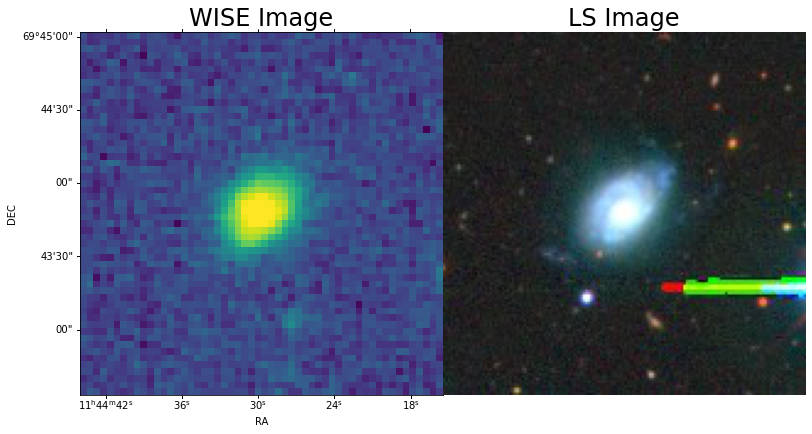

In [15]:
plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=.0)
for i,im in enumerate(images):
    plt.xlabel('RA')
    if i == 0:
        plt.subplot(1,2,i+1,projection = wcs_wise)
        norm = simple_norm(images[i],stretch='asinh',max_percent=99.5)
        plt.imshow(im,origin='lower',cmap='viridis',norm=norm)
        plt.ylabel('DEC')
        ax = plt.gca()
        ax.set_yticks([])
    if i == 1:
        plt.subplot(1,2,i+1)
        plt.imshow(mpimg.imread(images[i]),origin='lower')
        plt.gca().invert_yaxis()
        plt.axis("off")

    plt.subplots_adjust(wspace=0,hspace=0)
    plt.title(titles[i],fontsize=24)

In [36]:
#now do likewise with the r-band image, to ensure pixscale and such from w3 is harmonious.
rband_im, rband_h = fits.getdata(homedir+'/UGC06711/UGC06711-custom-image-r.fits.fz',header=True)

rband_image = homedir+'/UGC06711/UGC06711-custom-image-r.fits.fz'
rband_hdu = fits.open(rband_image)[1]

r_scaled, footprint = reproject_interp(rband_hdu, wise_hdu.header)
#can also type r_scaled, footprint = reproject_interp((rband_hdu.data, rband_hdu.header), wise_hdu.header)

images=[r_scaled,filename_2]
titles=['r-band Image','LS Image']

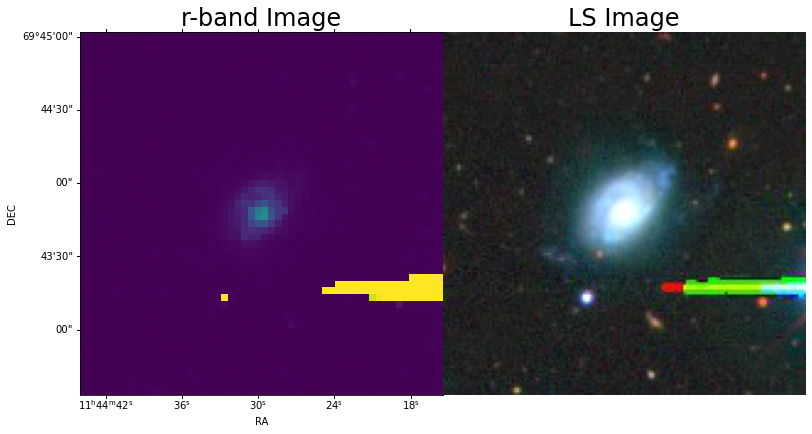

In [37]:
plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=.0)
for i,im in enumerate(images):
    plt.xlabel('RA')
    if i == 0:
        plt.subplot(1,2,i+1,projection = wcs_wise)
        norm = simple_norm(images[i],stretch='asinh',max_percent=99.5)
        plt.imshow(im,origin='lower',cmap='viridis',norm=norm)
        plt.ylabel('DEC')
        ax = plt.gca()
        ax.set_yticks([])
    if i == 1:
        plt.subplot(1,2,i+1)
        plt.imshow(mpimg.imread(images[i]),origin='lower')
        plt.gca().invert_yaxis()
        plt.axis("off")

    plt.subplots_adjust(wspace=0,hspace=0)
    plt.title(titles[i],fontsize=24)